In [2]:
import sys
sys.path.append('..')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sfp_nsdsyn import *
import warnings
import itertools

warnings.filterwarnings("ignore", category=UserWarning)
pd.options.mode.chained_assignment = None
%load_ext autoreload
%autoreload 2

In [8]:
output_dir='/Volumes/server/Projects/sfp_nsd/derivatives'

ARGS_2D = ['sub','lr','eph','roi','dset']
broderick_sn_list = [1, 6, 7, 45, 46, 62, 64, 81, 95, 114, 115, 121]
broderick_subj_list = [utils.sub_number_to_string(sn, dataset="broderick") for sn in broderick_sn_list]

lr=0.0005
eph=100
dset='broderick'

# Load model 

In [9]:
pt_file_list = []
for subj, roi in itertools.product(broderick_subj_list[:1], ['V1']):
    file_name = f'tfunc-corrected_model-params_lr-{lr}_eph-{eph}_dset-{dset}_sub-wlsubj001_roi-V1_vs-pRFsize.pt'
    pt_file_list.append(os.path.join(output_dir, 'sfp_model', 'results_2D', dset, file_name))
model.load_all_models(pt_file_list, *ARGS_2D)

,sigma,slope,intercept,p_1,p_2,p_3,p_4,A_1,A_2,sub,lr_rate,max_epoch,vroinames,dset
0,1.548504,0.707695,0.593469,-0.039414,0.139283,0.08559,0.122238,0.831614,-0.004185,wlsubj001,0.0005,100,V1,broderick


In [23]:
l, m = [], []
for subj, roi in itertools.product(broderick_subj_list[:1], ['V1']):
    loss_file_name = f'tfunc-corrected_loss-history_lr-{lr}_eph-{eph}_dset-{dset}_sub-wlsubj001_roi-V1_vs-pRFsize.h5'
    l.append(os.path.join(output_dir, 'sfp_model', 'results_2D', dset, loss_file_name))
    param_file_name = f'tfunc-corrected_model-history_lr-{lr}_eph-{eph}_dset-{dset}_sub-wlsubj001_roi-V1_vs-pRFsize.h5'
    m.append(os.path.join(output_dir, 'sfp_model', 'results_2D', dset, param_file_name))

In [11]:
loss_df = pd.DataFrame({})    
for l_file in l:
    tmp_df = utils.load_dataframes([l_file], *ARGS_2D)
    tmp_df = tmp_df[tmp_df.epoch % 2 == 0]
    loss_df = pd.concat((loss_df, tmp_df), axis=0)

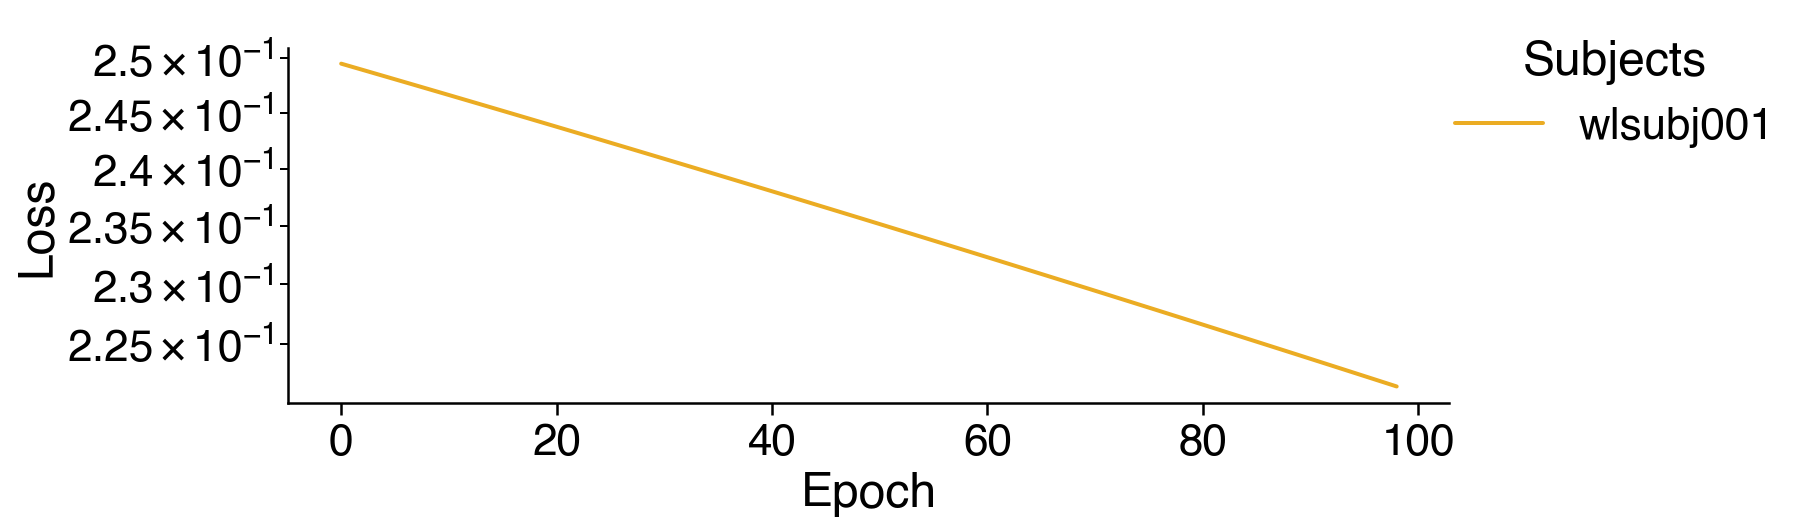

In [22]:
vis.plot_loss_history(loss_df, hue='sub', lgd_title='Subjects', hue_order=broderick_subj_list[:1], palette=utils.new_subj_colors(broderick_subj_list[:1]))

In [30]:
param_df = pd.DataFrame({})    
for m_file in m:
    tmp_df = utils.load_dataframes([m_file], *ARGS_2D)
    tmp_df = tmp_df[tmp_df.epoch % 2 == 0]
    param_df = pd.concat((param_df, tmp_df), axis=0)

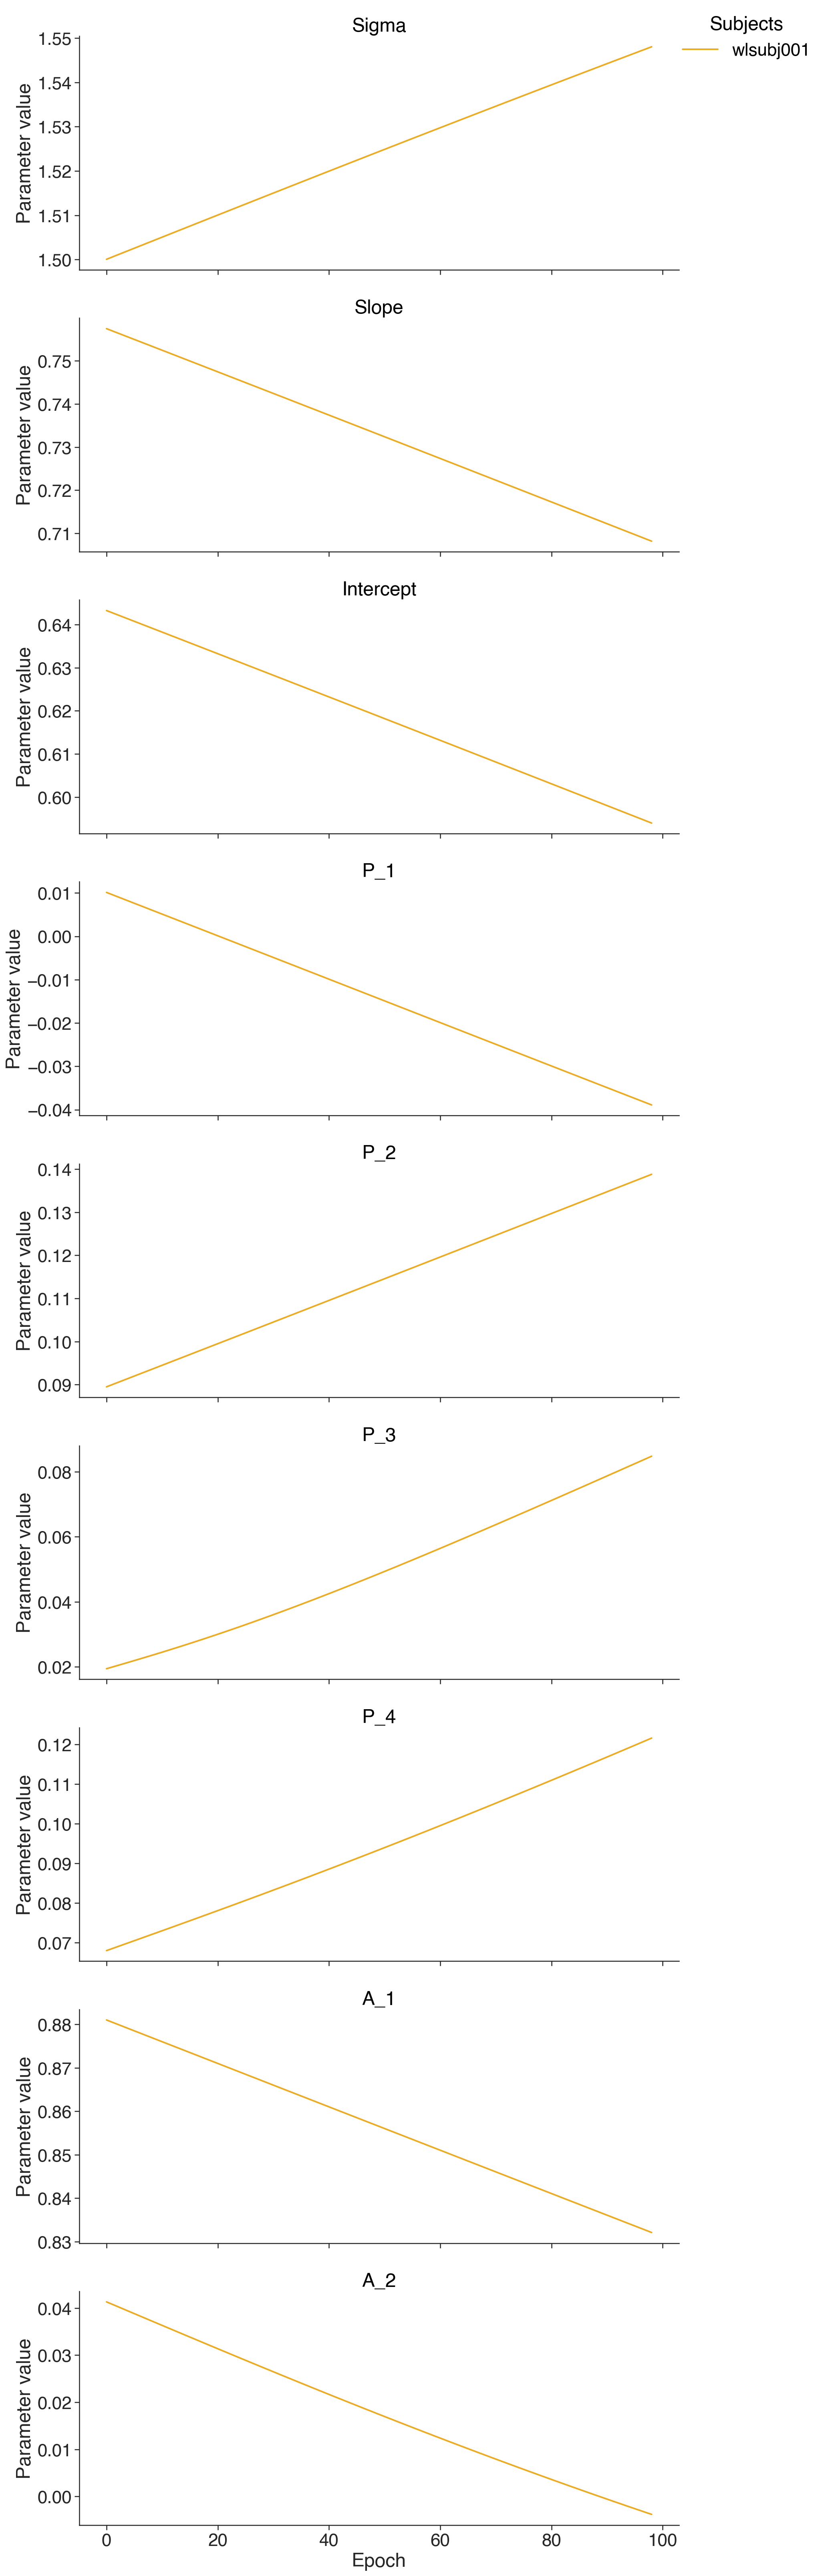

In [31]:
vis.plot_param_history(param_df, params=['sigma', 'slope', 'intercept', 'p_1', 'p_2', 'p_3', 'p_4', 'A_1', 'A_2'],

hue='sub', lgd_title='Subjects', hue_order=broderick_subj_list[:1], palette=utils.new_subj_colors(broderick_subj_list[:1]))

In [29]:
param_df

,epoch,loss,sub,lr_rate,max_epoch,vroinames,dset
0,0,0.249513,wlsubj001,0.0005,100,V1,broderick
2,2,0.248938,wlsubj001,0.0005,100,V1,broderick
4,4,0.248363,wlsubj001,0.0005,100,V1,broderick
6,6,0.247788,wlsubj001,0.0005,100,V1,broderick
8,8,0.247214,wlsubj001,0.0005,100,V1,broderick
10,10,0.246639,wlsubj001,0.0005,100,V1,broderick
12,12,0.246064,wlsubj001,0.0005,100,V1,broderick
14,14,0.245489,wlsubj001,0.0005,100,V1,broderick
16,16,0.244915,wlsubj001,0.0005,100,V1,broderick
18,18,0.244340,wlsubj001,0.0005,100,V1,broderick
